In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# fix random seed for reproducibility
np.random.seed(7)

In [25]:
# Import data cell
#  - Creates two dataframes, one for test data and one for training data. 
#  - Add labels two both datasets 
#  - Time countinuos

gear2Path = os.path.normpath('Gear2')
gear3Path = os.path.normpath('Gear3')
gear4Path = os.path.normpath('Gear4')
doublePath = os.path.normpath('Double')
pathList = [gear2Path,gear3Path,gear4Path,doublePath]
classDict = {'Gear2':0,'Gear3':1,'Gear4':2,'Double':3}
dataListR = []
testSetList = []
label = pd.DataFrame()

for p in pathList:
    pPath = os.path.normpath('/Users/mariekorneliusson/documents/AiSports/skate_without_video') + '/' + p
    dirs = os.listdir(pPath)
    for i in range(len(dirs)):    
        tempP = pPath + '/' + dirs[i]
        d = pd.read_csv(tempP,low_memory = False)
        label = pd.DataFrame({'label': classDict[p]*np.ones(len(d),)})
        d = d.join(label)
        if i == 0 :
            testSetList.append(d)
        else:
            dataListR.append(d)

# To get random a random order of segments 
dataOrder = np.random.choice(len(dataListR), size=len(dataListR), replace=False)

# Append segements to one trainingset, and add time sequences to one time countinuos time vector     
skiDataRandom = pd.DataFrame()
addT = 0
for i in dataOrder:
    dataListR[i].t = dataListR[i].t + addT
    addT = dataListR[i].t[len(dataListR[i].t) -1] + 0.02
    skiDataRandom = skiDataRandom.append(dataListR[i]) 

# Append segements to one testset and add time sequences to one time countinuos time vector 
testData = pd.DataFrame()
addT = 0
for i in range(len(testSetList)):
    testSetList[i].t = testSetList[i].t + addT
    addT = testSetList[i].t[len(testSetList[i].t) -1] + 0.02
    testData = testData.append(testSetList[i])

In [26]:
# Change type fro dataframe to ndarray and reshape to fit lstm model.
trainX = skiDataRandom.loc[:,'fL':'a3R'].values
trainY = pd.get_dummies(skiDataRandom['label']).values
testX = testData.loc[:,'fL':'a3R'].values
testY = pd.get_dummies(testData['label']).values

nbrSamples = trainX.shape[0]
nbrSamplesTest = testX.shape[0]
dataDimX = trainX.shape[1]
timesteps = 1
nbrOfClasses = 4

trainX= trainX.reshape(nbrSamples,timesteps,dataDimX)
trainY = trainY.reshape(nbrSamples,timesteps,nbrOfClasses)
testX= testX.reshape(nbrSamplesTest,timesteps,dataDimX)
testY = testY.reshape(nbrSamplesTest,timesteps,nbrOfClasses)

In [27]:
def modelSingleLSTMlayer(hidden_dim):
    
    model = Sequential()
    model.add(LSTM(hidden_dim,return_sequences=True,input_shape=(timesteps, dataDimX)))
    model.add(Dense(nbrOfClasses, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    
    return model

Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 17s 979us/step - loss: 1.4182 - categorical_accuracy: 0.3033 - val_loss: 1.3579 - val_categorical_accuracy: 0.3017
Epoch 2/30
17727/17727 [==============================] - 2s 114us/step - loss: 1.2922 - categorical_accuracy: 0.4139 - val_loss: 1.2944 - val_categorical_accuracy: 0.3073
Epoch 3/30
17727/17727 [==============================] - 1s 80us/step - loss: 1.2048 - categorical_accuracy: 0.4788 - val_loss: 1.2581 - val_categorical_accuracy: 0.3739
Epoch 4/30
17727/17727 [==============================] - 1s 75us/step - loss: 1.1566 - categorical_accuracy: 0.5069 - val_loss: 1.2100 - val_categorical_accuracy: 0.3849
Epoch 5/30
17727/17727 [==============================] - 1s 75us/step - loss: 1.0940 - categorical_accuracy: 0.5360 - val_loss: 1.1642 - val_categorical_accuracy: 0.4070
Epoch 6/30
17727/17727 [==============================] - 1s 74us/step - loss: 1.0447 - categ

17727/17727 [==============================] - 1s 76us/step - loss: 0.8284 - categorical_accuracy: 0.6556 - val_loss: 0.9754 - val_categorical_accuracy: 0.5093
Epoch 18/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.8164 - categorical_accuracy: 0.6602 - val_loss: 0.9781 - val_categorical_accuracy: 0.5149
Epoch 19/30
17727/17727 [==============================] - 1s 76us/step - loss: 0.8036 - categorical_accuracy: 0.6693 - val_loss: 0.9557 - val_categorical_accuracy: 0.5190
Epoch 20/30
17727/17727 [==============================] - 1s 78us/step - loss: 0.7933 - categorical_accuracy: 0.6745 - val_loss: 0.9510 - val_categorical_accuracy: 0.5253
Epoch 21/30
17727/17727 [==============================] - 1s 83us/step - loss: 0.7870 - categorical_accuracy: 0.6747 - val_loss: 0.9412 - val_categorical_accuracy: 0.5302
Epoch 22/30
17727/17727 [==============================] - 1s 78us/step - loss: 0.7774 - categorical_accuracy: 0.6794 - val_loss: 0.9349 - val_categoric

17727/17727 [==============================] - 1s 63us/step - loss: 1.1987 - categorical_accuracy: 0.4421 - val_loss: 1.3242 - val_categorical_accuracy: 0.3030
Epoch 5/30
17727/17727 [==============================] - 1s 63us/step - loss: 1.1616 - categorical_accuracy: 0.4828 - val_loss: 1.2452 - val_categorical_accuracy: 0.3978
Epoch 6/30
17727/17727 [==============================] - 1s 63us/step - loss: 1.1003 - categorical_accuracy: 0.5217 - val_loss: 1.2056 - val_categorical_accuracy: 0.3928
Epoch 7/30
17727/17727 [==============================] - 1s 63us/step - loss: 1.0775 - categorical_accuracy: 0.5482 - val_loss: 1.1878 - val_categorical_accuracy: 0.4231
Epoch 8/30
17727/17727 [==============================] - 1s 63us/step - loss: 1.0425 - categorical_accuracy: 0.5629 - val_loss: 1.1480 - val_categorical_accuracy: 0.4402
Epoch 9/30
17727/17727 [==============================] - 1s 63us/step - loss: 1.0118 - categorical_accuracy: 0.5752 - val_loss: 1.1315 - val_categorical_ac

17727/17727 [==============================] - 1s 68us/step - loss: 0.7713 - categorical_accuracy: 0.6757 - val_loss: 0.8922 - val_categorical_accuracy: 0.5512
Epoch 22/30
17727/17727 [==============================] - 1s 68us/step - loss: 0.7606 - categorical_accuracy: 0.6789 - val_loss: 0.8849 - val_categorical_accuracy: 0.5575
Epoch 23/30
17727/17727 [==============================] - 1s 65us/step - loss: 0.7447 - categorical_accuracy: 0.6875 - val_loss: 0.8749 - val_categorical_accuracy: 0.5614
Epoch 24/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.7318 - categorical_accuracy: 0.6940 - val_loss: 0.8744 - val_categorical_accuracy: 0.5627
Epoch 25/30
17727/17727 [==============================] - 1s 73us/step - loss: 0.7221 - categorical_accuracy: 0.7006 - val_loss: 0.8623 - val_categorical_accuracy: 0.5718
Epoch 26/30
17727/17727 [==============================] - 1s 66us/step - loss: 0.7122 - categorical_accuracy: 0.7046 - val_loss: 0.8538 - val_categoric

17727/17727 [==============================] - 1s 66us/step - loss: 0.9187 - categorical_accuracy: 0.6019 - val_loss: 1.0278 - val_categorical_accuracy: 0.4486
Epoch 9/30
17727/17727 [==============================] - 1s 66us/step - loss: 0.8839 - categorical_accuracy: 0.6251 - val_loss: 1.0085 - val_categorical_accuracy: 0.4598
Epoch 10/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.8552 - categorical_accuracy: 0.6368 - val_loss: 0.9910 - val_categorical_accuracy: 0.4772
Epoch 11/30
17727/17727 [==============================] - 1s 66us/step - loss: 0.8384 - categorical_accuracy: 0.6427 - val_loss: 0.9720 - val_categorical_accuracy: 0.4883
Epoch 12/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.8178 - categorical_accuracy: 0.6543 - val_loss: 0.9530 - val_categorical_accuracy: 0.5081
Epoch 13/30
17727/17727 [==============================] - 1s 66us/step - loss: 0.8033 - categorical_accuracy: 0.6576 - val_loss: 0.9448 - val_categorica

17727/17727 [==============================] - 1s 67us/step - loss: 0.6427 - categorical_accuracy: 0.7338 - val_loss: 0.8033 - val_categorical_accuracy: 0.6185
Epoch 26/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.6341 - categorical_accuracy: 0.7385 - val_loss: 0.7984 - val_categorical_accuracy: 0.6257
Epoch 27/30
17727/17727 [==============================] - 1s 66us/step - loss: 0.6259 - categorical_accuracy: 0.7427 - val_loss: 0.7916 - val_categorical_accuracy: 0.6264
Epoch 28/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.6196 - categorical_accuracy: 0.7438 - val_loss: 0.7852 - val_categorical_accuracy: 0.6300
Epoch 29/30
17727/17727 [==============================] - 1s 66us/step - loss: 0.6127 - categorical_accuracy: 0.7486 - val_loss: 0.7797 - val_categorical_accuracy: 0.6329
Epoch 30/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.6063 - categorical_accuracy: 0.7508 - val_loss: 0.7759 - val_categoric

17727/17727 [==============================] - 1s 66us/step - loss: 0.8525 - categorical_accuracy: 0.6356 - val_loss: 1.0021 - val_categorical_accuracy: 0.4765
Epoch 13/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.8339 - categorical_accuracy: 0.6464 - val_loss: 0.9829 - val_categorical_accuracy: 0.4847
Epoch 14/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.8193 - categorical_accuracy: 0.6525 - val_loss: 0.9700 - val_categorical_accuracy: 0.4973
Epoch 15/30
17727/17727 [==============================] - 1s 67us/step - loss: 0.8077 - categorical_accuracy: 0.6580 - val_loss: 0.9531 - val_categorical_accuracy: 0.5160
Epoch 16/30
17727/17727 [==============================] - 1s 66us/step - loss: 0.7855 - categorical_accuracy: 0.6672 - val_loss: 0.9446 - val_categorical_accuracy: 0.5259
Epoch 17/30
17727/17727 [==============================] - 1s 68us/step - loss: 0.7768 - categorical_accuracy: 0.6714 - val_loss: 0.9158 - val_categoric

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 14s 786us/step - loss: 1.3901 - categorical_accuracy: 0.3892 - val_loss: 1.5283 - val_categorical_accuracy: 0.2606
Epoch 2/30
17727/17727 [==============================] - 2s 87us/step - loss: 1.2130 - categorical_accuracy: 0.4657 - val_loss: 1.3249 - val_categorical_accuracy: 0.2949
Epoch 3/30
17727/17727 [==============================] - 1s 76us/step - loss: 1.1080 - categorical_accuracy: 0.5013 - val_loss: 1.2429 - val_categorical_accuracy: 0.3563
Epoch 4/30
17727/17727 [==============================] - 1s 77us/step - loss: 1.0334 - categorical_accuracy: 0.5560 - val_loss: 1.2044 - val_categorical_accuracy: 0.3601
Epoch 5/30
17727/17727 [==============================] - 1s 74us/step - loss: 0.9771 - categorical_accuracy: 0.5775 - val_loss: 1.1197 - val_categorical_accuracy: 0.3870
Epoch 6/30
17727/17727 [==============================] - 1s 74us/step - loss: 0.9323 - catego

17727/17727 [==============================] - 1s 75us/step - loss: 0.6777 - categorical_accuracy: 0.7177 - val_loss: 0.8267 - val_categorical_accuracy: 0.5930
Epoch 19/30
17727/17727 [==============================] - 1s 75us/step - loss: 0.6623 - categorical_accuracy: 0.7236 - val_loss: 0.8200 - val_categorical_accuracy: 0.5981
Epoch 20/30
17727/17727 [==============================] - 1s 75us/step - loss: 0.6499 - categorical_accuracy: 0.7296 - val_loss: 0.8106 - val_categorical_accuracy: 0.6004
Epoch 21/30
17727/17727 [==============================] - 1s 75us/step - loss: 0.6382 - categorical_accuracy: 0.7353 - val_loss: 0.8041 - val_categorical_accuracy: 0.6115
Epoch 22/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.6289 - categorical_accuracy: 0.7397 - val_loss: 0.7876 - val_categorical_accuracy: 0.6205
Epoch 23/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.6180 - categorical_accuracy: 0.7443 - val_loss: 0.7830 - val_categoric

17727/17727 [==============================] - 1s 76us/step - loss: 0.9966 - categorical_accuracy: 0.5651 - val_loss: 1.1452 - val_categorical_accuracy: 0.3960
Epoch 6/30
17727/17727 [==============================] - 1s 75us/step - loss: 0.9559 - categorical_accuracy: 0.5826 - val_loss: 1.0838 - val_categorical_accuracy: 0.4262
Epoch 7/30
17727/17727 [==============================] - 1s 75us/step - loss: 0.9112 - categorical_accuracy: 0.5999 - val_loss: 1.0547 - val_categorical_accuracy: 0.4438
Epoch 8/30
17727/17727 [==============================] - 1s 75us/step - loss: 0.8761 - categorical_accuracy: 0.6207 - val_loss: 1.0412 - val_categorical_accuracy: 0.4619
Epoch 9/30
17727/17727 [==============================] - 1s 75us/step - loss: 0.8559 - categorical_accuracy: 0.6324 - val_loss: 1.0100 - val_categorical_accuracy: 0.4720
Epoch 10/30
17727/17727 [==============================] - 1s 76us/step - loss: 0.8227 - categorical_accuracy: 0.6470 - val_loss: 0.9938 - val_categorical_a

17727/17727 [==============================] - 2s 95us/step - loss: 0.6276 - categorical_accuracy: 0.7310 - val_loss: 0.7958 - val_categorical_accuracy: 0.6094
Epoch 23/30
17727/17727 [==============================] - 2s 112us/step - loss: 0.6164 - categorical_accuracy: 0.7363 - val_loss: 0.7866 - val_categorical_accuracy: 0.6144
Epoch 24/30
17727/17727 [==============================] - 2s 126us/step - loss: 0.6053 - categorical_accuracy: 0.7414 - val_loss: 0.7857 - val_categorical_accuracy: 0.6157
Epoch 25/30
17727/17727 [==============================] - 2s 108us/step - loss: 0.5968 - categorical_accuracy: 0.7447 - val_loss: 0.7764 - val_categorical_accuracy: 0.6216
Epoch 26/30
17727/17727 [==============================] - 2s 100us/step - loss: 0.5861 - categorical_accuracy: 0.7498 - val_loss: 0.7768 - val_categorical_accuracy: 0.6236
Epoch 27/30
17727/17727 [==============================] - 2s 103us/step - loss: 0.5760 - categorical_accuracy: 0.7544 - val_loss: 0.7687 - val_cate

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 19s 1ms/step - loss: 1.3925 - categorical_accuracy: 0.4216 - val_loss: 1.4965 - val_categorical_accuracy: 0.2534
Epoch 2/30
17727/17727 [==============================] - 2s 99us/step - loss: 1.1854 - categorical_accuracy: 0.4770 - val_loss: 1.3383 - val_categorical_accuracy: 0.3303
Epoch 3/30
17727/17727 [==============================] - 2s 98us/step - loss: 1.0871 - categorical_accuracy: 0.5118 - val_loss: 1.2515 - val_categorical_accuracy: 0.3630
Epoch 4/30
17727/17727 [==============================] - 2s 96us/step - loss: 1.0127 - categorical_accuracy: 0.5516 - val_loss: 1.1700 - val_categorical_accuracy: 0.3912
Epoch 5/30
17727/17727 [==============================] - 2s 94us/step - loss: 0.9577 - categorical_accuracy: 0.5813 - val_loss: 1.1182 - val_categorical_accuracy: 0.4149
Epoch 6/30
17727/17727 [==============================] - 2s 96us/step - loss: 0.9072 - categori

17727/17727 [==============================] - 2s 116us/step - loss: 0.6356 - categorical_accuracy: 0.7267 - val_loss: 0.8202 - val_categorical_accuracy: 0.5720
Epoch 19/30
17727/17727 [==============================] - 2s 119us/step - loss: 0.6187 - categorical_accuracy: 0.7338 - val_loss: 0.8096 - val_categorical_accuracy: 0.5810
Epoch 20/30
17727/17727 [==============================] - 2s 130us/step - loss: 0.6096 - categorical_accuracy: 0.7379 - val_loss: 0.8014 - val_categorical_accuracy: 0.5894
Epoch 21/30
17727/17727 [==============================] - 2s 130us/step - loss: 0.5961 - categorical_accuracy: 0.7443 - val_loss: 0.7962 - val_categorical_accuracy: 0.5988
Epoch 22/30
17727/17727 [==============================] - 2s 119us/step - loss: 0.5852 - categorical_accuracy: 0.7514 - val_loss: 0.7957 - val_categorical_accuracy: 0.5993
Epoch 23/30
17727/17727 [==============================] - 2s 117us/step - loss: 0.5708 - categorical_accuracy: 0.7570 - val_loss: 0.7877 - val_cat

Epoch 5/30
17727/17727 [==============================] - 2s 126us/step - loss: 0.9754 - categorical_accuracy: 0.5832 - val_loss: 1.1258 - val_categorical_accuracy: 0.3989
Epoch 6/30
17727/17727 [==============================] - 2s 119us/step - loss: 0.9306 - categorical_accuracy: 0.5993 - val_loss: 1.0777 - val_categorical_accuracy: 0.4095
Epoch 7/30
17727/17727 [==============================] - 2s 133us/step - loss: 0.8928 - categorical_accuracy: 0.6143 - val_loss: 1.0591 - val_categorical_accuracy: 0.4258
Epoch 8/30
17727/17727 [==============================] - 2s 119us/step - loss: 0.8597 - categorical_accuracy: 0.6334 - val_loss: 0.9945 - val_categorical_accuracy: 0.4592
Epoch 9/30
17727/17727 [==============================] - 2s 123us/step - loss: 0.8282 - categorical_accuracy: 0.6459 - val_loss: 0.9529 - val_categorical_accuracy: 0.4880
Epoch 10/30
17727/17727 [==============================] - 2s 120us/step - loss: 0.8008 - categorical_accuracy: 0.6624 - val_loss: 0.9617 - 

17727/17727 [==============================] - 2s 97us/step - loss: 0.5917 - categorical_accuracy: 0.7465 - val_loss: 0.7939 - val_categorical_accuracy: 0.6083
Epoch 23/30
17727/17727 [==============================] - 2s 133us/step - loss: 0.5794 - categorical_accuracy: 0.7548 - val_loss: 0.7909 - val_categorical_accuracy: 0.6117
Epoch 24/30
17727/17727 [==============================] - 2s 117us/step - loss: 0.5698 - categorical_accuracy: 0.7577 - val_loss: 0.7791 - val_categorical_accuracy: 0.6205
Epoch 25/30
17727/17727 [==============================] - 2s 118us/step - loss: 0.5603 - categorical_accuracy: 0.7624 - val_loss: 0.7764 - val_categorical_accuracy: 0.6243
Epoch 26/30
17727/17727 [==============================] - 3s 154us/step - loss: 0.5500 - categorical_accuracy: 0.7685 - val_loss: 0.7688 - val_categorical_accuracy: 0.6273
Epoch 27/30
17727/17727 [==============================] - 2s 125us/step - loss: 0.5403 - categorical_accuracy: 0.7742 - val_loss: 0.7616 - val_cate

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 21s 1ms/step - loss: 1.5217 - categorical_accuracy: 0.4191 - val_loss: 1.5468 - val_categorical_accuracy: 0.2559
Epoch 2/30
17727/17727 [==============================] - 4s 240us/step - loss: 1.2073 - categorical_accuracy: 0.4901 - val_loss: 1.4321 - val_categorical_accuracy: 0.2951
Epoch 3/30
17727/17727 [==============================] - 4s 242us/step - loss: 1.1059 - categorical_accuracy: 0.5254 - val_loss: 1.2507 - val_categorical_accuracy: 0.3488
Epoch 4/30
17727/17727 [==============================] - 4s 238us/step - loss: 1.0073 - categorical_accuracy: 0.5585 - val_loss: 1.1723 - val_categorical_accuracy: 0.3703
Epoch 5/30
17727/17727 [==============================] - 4s 243us/step - loss: 0.9460 - categorical_accuracy: 0.5899 - val_loss: 1.0915 - val_categorical_accuracy: 0.4064
Epoch 6/30
17727/17727 [==============================] - 4s 240us/step - loss: 0.8951 - cat

17727/17727 [==============================] - 4s 245us/step - loss: 0.6314 - categorical_accuracy: 0.7280 - val_loss: 0.8625 - val_categorical_accuracy: 0.5616
Epoch 18/30
17727/17727 [==============================] - 4s 241us/step - loss: 0.6212 - categorical_accuracy: 0.7307 - val_loss: 0.8259 - val_categorical_accuracy: 0.5828
Epoch 19/30
17727/17727 [==============================] - 4s 240us/step - loss: 0.6080 - categorical_accuracy: 0.7360 - val_loss: 0.8275 - val_categorical_accuracy: 0.5835
Epoch 20/30
17727/17727 [==============================] - 4s 246us/step - loss: 0.5894 - categorical_accuracy: 0.7467 - val_loss: 0.8070 - val_categorical_accuracy: 0.5921
Epoch 21/30
17727/17727 [==============================] - 4s 244us/step - loss: 0.5770 - categorical_accuracy: 0.7515 - val_loss: 0.8016 - val_categorical_accuracy: 0.5963
Epoch 22/30
17727/17727 [==============================] - 4s 247us/step - loss: 0.5622 - categorical_accuracy: 0.7591 - val_loss: 0.7899 - val_cat

17727/17727 [==============================] - 4s 244us/step - loss: 1.0954 - categorical_accuracy: 0.5215 - val_loss: 1.2992 - val_categorical_accuracy: 0.3197
Epoch 4/30
17727/17727 [==============================] - 4s 248us/step - loss: 1.0097 - categorical_accuracy: 0.5510 - val_loss: 1.2056 - val_categorical_accuracy: 0.3563
Epoch 5/30
17727/17727 [==============================] - 4s 233us/step - loss: 0.9630 - categorical_accuracy: 0.5811 - val_loss: 1.2205 - val_categorical_accuracy: 0.3594
Epoch 6/30
17727/17727 [==============================] - 4s 236us/step - loss: 0.9260 - categorical_accuracy: 0.5925 - val_loss: 1.1033 - val_categorical_accuracy: 0.4125
Epoch 7/30
17727/17727 [==============================] - 4s 239us/step - loss: 0.8839 - categorical_accuracy: 0.6099 - val_loss: 1.0250 - val_categorical_accuracy: 0.4558
Epoch 8/30
17727/17727 [==============================] - 4s 243us/step - loss: 0.8509 - categorical_accuracy: 0.6249 - val_loss: 0.9883 - val_categori

17727/17727 [==============================] - 3s 189us/step - loss: 0.5896 - categorical_accuracy: 0.7444 - val_loss: 0.7891 - val_categorical_accuracy: 0.6196
Epoch 21/30
17727/17727 [==============================] - 3s 190us/step - loss: 0.5812 - categorical_accuracy: 0.7476 - val_loss: 0.7798 - val_categorical_accuracy: 0.6187
Epoch 22/30
17727/17727 [==============================] - 3s 191us/step - loss: 0.5669 - categorical_accuracy: 0.7556 - val_loss: 0.7813 - val_categorical_accuracy: 0.6221
Epoch 23/30
17727/17727 [==============================] - 3s 192us/step - loss: 0.5562 - categorical_accuracy: 0.7625 - val_loss: 0.7760 - val_categorical_accuracy: 0.6304
Epoch 24/30
17727/17727 [==============================] - 3s 189us/step - loss: 0.5483 - categorical_accuracy: 0.7640 - val_loss: 0.7819 - val_categorical_accuracy: 0.6236
Epoch 25/30
17727/17727 [==============================] - 4s 234us/step - loss: 0.5385 - categorical_accuracy: 0.7696 - val_loss: 0.7677 - val_cat

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 24s 1ms/step - loss: 1.5413 - categorical_accuracy: 0.4344 - val_loss: 1.5272 - val_categorical_accuracy: 0.2683
Epoch 2/30
17727/17727 [==============================] - 5s 275us/step - loss: 1.2060 - categorical_accuracy: 0.4842 - val_loss: 1.3493 - val_categorical_accuracy: 0.2972
Epoch 3/30
17727/17727 [==============================] - 5s 269us/step - loss: 1.0813 - categorical_accuracy: 0.5218 - val_loss: 1.2409 - val_categorical_accuracy: 0.3355
Epoch 4/30
17727/17727 [==============================] - 5s 268us/step - loss: 0.9956 - categorical_accuracy: 0.5588 - val_loss: 1.2272 - val_categorical_accuracy: 0.3579
Epoch 5/30
17727/17727 [==============================] - 5s 297us/step - loss: 0.9630 - categorical_accuracy: 0.5822 - val_loss: 1.1083 - val_categorical_accuracy: 0.4068
Epoch 6/30
17727/17727 [==============================] - 5s 269us/step - loss: 0.8948 - cat

Epoch 18/30
17727/17727 [==============================] - 4s 228us/step - loss: 0.6180 - categorical_accuracy: 0.7300 - val_loss: 0.8257 - val_categorical_accuracy: 0.5684
Epoch 19/30
17727/17727 [==============================] - 4s 233us/step - loss: 0.6070 - categorical_accuracy: 0.7336 - val_loss: 0.8042 - val_categorical_accuracy: 0.5909
Epoch 20/30
17727/17727 [==============================] - 4s 235us/step - loss: 0.5896 - categorical_accuracy: 0.7434 - val_loss: 0.8003 - val_categorical_accuracy: 0.5918
Epoch 21/30
17727/17727 [==============================] - 4s 229us/step - loss: 0.5775 - categorical_accuracy: 0.7485 - val_loss: 0.7871 - val_categorical_accuracy: 0.6024
Epoch 22/30
17727/17727 [==============================] - 4s 229us/step - loss: 0.5652 - categorical_accuracy: 0.7533 - val_loss: 0.7840 - val_categorical_accuracy: 0.5977
Epoch 23/30
17727/17727 [==============================] - 4s 229us/step - loss: 0.5524 - categorical_accuracy: 0.7588 - val_loss: 0.77

Epoch 5/30
17727/17727 [==============================] - 5s 275us/step - loss: 0.9570 - categorical_accuracy: 0.5875 - val_loss: 1.0940 - val_categorical_accuracy: 0.4050
Epoch 6/30
17727/17727 [==============================] - 6s 350us/step - loss: 0.8989 - categorical_accuracy: 0.6151 - val_loss: 1.0560 - val_categorical_accuracy: 0.4292
Epoch 7/30
17727/17727 [==============================] - 6s 353us/step - loss: 0.8655 - categorical_accuracy: 0.6249 - val_loss: 1.0131 - val_categorical_accuracy: 0.4477
Epoch 8/30
17727/17727 [==============================] - 6s 364us/step - loss: 0.8214 - categorical_accuracy: 0.6438 - val_loss: 0.9709 - val_categorical_accuracy: 0.4849
Epoch 9/30
17727/17727 [==============================] - 6s 342us/step - loss: 0.7924 - categorical_accuracy: 0.6604 - val_loss: 0.9137 - val_categorical_accuracy: 0.5099
Epoch 10/30
17727/17727 [==============================] - 6s 342us/step - loss: 0.7543 - categorical_accuracy: 0.6787 - val_loss: 0.8903 - 

17727/17727 [==============================] - 4s 229us/step - loss: 0.5726 - categorical_accuracy: 0.7565 - val_loss: 0.7524 - val_categorical_accuracy: 0.6157
Epoch 23/30
17727/17727 [==============================] - 5s 255us/step - loss: 0.5529 - categorical_accuracy: 0.7659 - val_loss: 0.7589 - val_categorical_accuracy: 0.6148
Epoch 24/30
17727/17727 [==============================] - 4s 240us/step - loss: 0.5430 - categorical_accuracy: 0.7674 - val_loss: 0.7408 - val_categorical_accuracy: 0.6259
Epoch 25/30
17727/17727 [==============================] - 5s 267us/step - loss: 0.5294 - categorical_accuracy: 0.7711 - val_loss: 0.7391 - val_categorical_accuracy: 0.6241
Epoch 26/30
17727/17727 [==============================] - 5s 306us/step - loss: 0.5191 - categorical_accuracy: 0.7804 - val_loss: 0.7337 - val_categorical_accuracy: 0.6354
Epoch 27/30
17727/17727 [==============================] - 5s 263us/step - loss: 0.5070 - categorical_accuracy: 0.7833 - val_loss: 0.7341 - val_cat

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 26s 1ms/step - loss: 1.5437 - categorical_accuracy: 0.4296 - val_loss: 1.5546 - val_categorical_accuracy: 0.2505
Epoch 2/30
17727/17727 [==============================] - 6s 363us/step - loss: 1.2082 - categorical_accuracy: 0.4788 - val_loss: 1.3729 - val_categorical_accuracy: 0.2888
Epoch 3/30
17727/17727 [==============================] - 7s 369us/step - loss: 1.0738 - categorical_accuracy: 0.5220 - val_loss: 1.2968 - val_categorical_accuracy: 0.3220
Epoch 4/30
17727/17727 [==============================] - 6s 367us/step - loss: 1.0079 - categorical_accuracy: 0.5564 - val_loss: 1.2415 - val_categorical_accuracy: 0.3441
Epoch 5/30
17727/17727 [==============================] - 6s 362us/step - loss: 0.9665 - categorical_accuracy: 0.5797 - val_loss: 1.1386 - val_categorical_accuracy: 0.3847
Epoch 6/30
17727/17727 [==============================] - 6s 366us/step - loss: 0.9258 - cat

Epoch 18/30
17727/17727 [==============================] - 6s 363us/step - loss: 0.6173 - categorical_accuracy: 0.7412 - val_loss: 0.7823 - val_categorical_accuracy: 0.5894
Epoch 19/30
17727/17727 [==============================] - 6s 349us/step - loss: 0.6009 - categorical_accuracy: 0.7474 - val_loss: 0.7721 - val_categorical_accuracy: 0.6024
Epoch 20/30
17727/17727 [==============================] - 6s 355us/step - loss: 0.5853 - categorical_accuracy: 0.7532 - val_loss: 0.7717 - val_categorical_accuracy: 0.6009
Epoch 21/30
17727/17727 [==============================] - 7s 368us/step - loss: 0.5713 - categorical_accuracy: 0.7584 - val_loss: 0.7690 - val_categorical_accuracy: 0.6117
Epoch 22/30
17727/17727 [==============================] - 6s 361us/step - loss: 0.5584 - categorical_accuracy: 0.7661 - val_loss: 0.7598 - val_categorical_accuracy: 0.6218
Epoch 23/30
17727/17727 [==============================] - 4209s 237ms/step - loss: 0.5488 - categorical_accuracy: 0.7683 - val_loss: 0

17727/17727 [==============================] - 6s 350us/step - loss: 1.0375 - categorical_accuracy: 0.5518 - val_loss: 1.2099 - val_categorical_accuracy: 0.3481
Epoch 5/30
17727/17727 [==============================] - 6s 348us/step - loss: 0.9662 - categorical_accuracy: 0.5853 - val_loss: 1.1799 - val_categorical_accuracy: 0.3655
Epoch 6/30
17727/17727 [==============================] - 6s 343us/step - loss: 0.9407 - categorical_accuracy: 0.5963 - val_loss: 1.0754 - val_categorical_accuracy: 0.4380
Epoch 7/30
17727/17727 [==============================] - 6s 347us/step - loss: 0.8809 - categorical_accuracy: 0.6188 - val_loss: 1.0338 - val_categorical_accuracy: 0.4574
Epoch 8/30
17727/17727 [==============================] - 6s 351us/step - loss: 0.8338 - categorical_accuracy: 0.6381 - val_loss: 0.9800 - val_categorical_accuracy: 0.4869
Epoch 9/30
17727/17727 [==============================] - 6s 346us/step - loss: 0.8050 - categorical_accuracy: 0.6486 - val_loss: 0.9517 - val_categori

17727/17727 [==============================] - 6s 341us/step - loss: 0.5828 - categorical_accuracy: 0.7487 - val_loss: 0.7910 - val_categorical_accuracy: 0.5968
Epoch 22/30
17727/17727 [==============================] - 7s 395us/step - loss: 0.5660 - categorical_accuracy: 0.7542 - val_loss: 0.7846 - val_categorical_accuracy: 0.6011
Epoch 23/30
17727/17727 [==============================] - 6s 350us/step - loss: 0.5520 - categorical_accuracy: 0.7618 - val_loss: 0.7744 - val_categorical_accuracy: 0.6088
Epoch 24/30
17727/17727 [==============================] - 7s 397us/step - loss: 0.5425 - categorical_accuracy: 0.7669 - val_loss: 0.7723 - val_categorical_accuracy: 0.6121
Epoch 25/30
17727/17727 [==============================] - 7s 406us/step - loss: 0.5272 - categorical_accuracy: 0.7767 - val_loss: 0.7610 - val_categorical_accuracy: 0.6176
Epoch 26/30
17727/17727 [==============================] - 8s 430us/step - loss: 0.5167 - categorical_accuracy: 0.7797 - val_loss: 0.7625 - val_cat

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


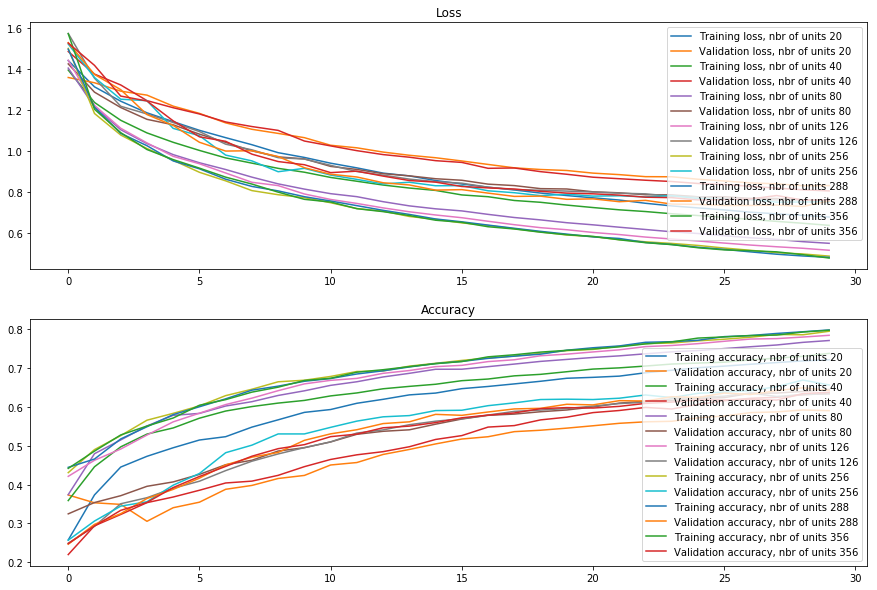

In [32]:
hidden_dim = [20,40,80,126,256,288,356]
testAcc = np.zeros((1,len(hidden_dim)))
nbrIts = 5

plt.figure(0,figsize=(15, 10))
for i in range(len(hidden_dim)):
    
    sumAcc = 0 
    for j in range(nbrIts):
        model = modelSingleLSTMlayer(hidden_dim[i])
        historyFirstModel = model.fit(trainX, trainY, epochs=30, batch_size=100, shuffle = False, validation_split=0.2)
    
        predY = model.predict(testX)
        yTestClass = np.argmax(testY, axis=2)
        yPredClass = np.argmax(predY, axis=2)
        sumAcc = sumAcc + (1/nbrIts)*(accuracy_score(yTestClass, yPredClass))
    
    testAcc[0,i] = sumAcc
    plt.subplot(2, 1, 1)
    plt.plot(historyFirstModel.history['loss'],label = 'Training loss, nbr of units ' + str(hidden_dim[i]))
    plt.plot(historyFirstModel.history['val_loss'],label = 'Validation loss, nbr of units ' + str(hidden_dim[i]))
    plt.title('Loss')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(historyFirstModel.history['categorical_accuracy'],label = 'Training accuracy, nbr of units ' + str(hidden_dim[i]))
    plt.plot(historyFirstModel.history['val_categorical_accuracy'],label = 'Validation accuracy, nbr of units ' + str(hidden_dim[i]))
    plt.title('Accuracy')
    plt.legend()


Text(0,0.5,'Test acc')

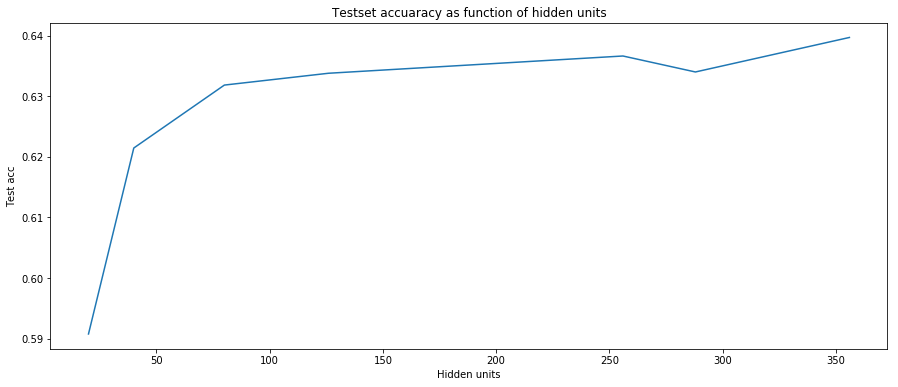

In [33]:
plt.figure(0,figsize=(15, 6))
plt.plot(hidden_dim,testAcc[0,:])
plt.title('Testset accuaracy as function of hidden units')
plt.xlabel('Hidden units')
plt.ylabel('Test acc')

Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 21s 1ms/step - loss: 1.2702 - categorical_accuracy: 0.3903 - val_loss: 1.2216 - val_categorical_accuracy: 0.3870
Epoch 2/30
17727/17727 [==============================] - 1s 82us/step - loss: 1.0882 - categorical_accuracy: 0.5525 - val_loss: 1.1168 - val_categorical_accuracy: 0.4596
Epoch 3/30
17727/17727 [==============================] - 1s 81us/step - loss: 0.9654 - categorical_accuracy: 0.6267 - val_loss: 1.0664 - val_categorical_accuracy: 0.4819
Epoch 4/30
17727/17727 [==============================] - 1s 83us/step - loss: 0.8609 - categorical_accuracy: 0.6804 - val_loss: 1.0096 - val_categorical_accuracy: 0.5099
Epoch 5/30
17727/17727 [==============================] - 1s 81us/step - loss: 0.7832 - categorical_accuracy: 0.7010 - val_loss: 0.9781 - val_categorical_accuracy: 0.5005
Epoch 6/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.7310 - categori

17727/17727 [==============================] - 1s 76us/step - loss: 0.5194 - categorical_accuracy: 0.8018 - val_loss: 0.7853 - val_categorical_accuracy: 0.6541
Epoch 19/30
17727/17727 [==============================] - 1s 78us/step - loss: 0.5075 - categorical_accuracy: 0.8079 - val_loss: 0.8428 - val_categorical_accuracy: 0.6234
Epoch 20/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.4991 - categorical_accuracy: 0.8103 - val_loss: 0.7966 - val_categorical_accuracy: 0.6421
Epoch 21/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.4886 - categorical_accuracy: 0.8130 - val_loss: 0.7721 - val_categorical_accuracy: 0.6573
Epoch 22/30
17727/17727 [==============================] - 1s 80us/step - loss: 0.4795 - categorical_accuracy: 0.8166 - val_loss: 0.8019 - val_categorical_accuracy: 0.6442
Epoch 23/30
17727/17727 [==============================] - 1s 76us/step - loss: 0.4692 - categorical_accuracy: 0.8215 - val_loss: 0.8031 - val_categoric

17727/17727 [==============================] - 1s 77us/step - loss: 0.7952 - categorical_accuracy: 0.7055 - val_loss: 0.9011 - val_categorical_accuracy: 0.5844
Epoch 6/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.7442 - categorical_accuracy: 0.7238 - val_loss: 0.8714 - val_categorical_accuracy: 0.5925
Epoch 7/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.7043 - categorical_accuracy: 0.7335 - val_loss: 0.8303 - val_categorical_accuracy: 0.6083
Epoch 8/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.6725 - categorical_accuracy: 0.7467 - val_loss: 0.8049 - val_categorical_accuracy: 0.6191
Epoch 9/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.6480 - categorical_accuracy: 0.7551 - val_loss: 0.7953 - val_categorical_accuracy: 0.6144
Epoch 10/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.6271 - categorical_accuracy: 0.7628 - val_loss: 0.7873 - val_categorical_a

17727/17727 [==============================] - 1s 78us/step - loss: 0.4447 - categorical_accuracy: 0.8395 - val_loss: 0.6963 - val_categorical_accuracy: 0.6922
Epoch 23/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.4375 - categorical_accuracy: 0.8405 - val_loss: 0.6777 - val_categorical_accuracy: 0.6972
Epoch 24/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.4321 - categorical_accuracy: 0.8406 - val_loss: 0.6738 - val_categorical_accuracy: 0.7056
Epoch 25/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.4256 - categorical_accuracy: 0.8458 - val_loss: 0.7476 - val_categorical_accuracy: 0.6654
Epoch 26/30
17727/17727 [==============================] - 1s 76us/step - loss: 0.4199 - categorical_accuracy: 0.8476 - val_loss: 0.6975 - val_categorical_accuracy: 0.6891
Epoch 27/30
17727/17727 [==============================] - 1s 77us/step - loss: 0.4156 - categorical_accuracy: 0.8488 - val_loss: 0.6842 - val_categoric

17727/17727 [==============================] - 1s 80us/step - loss: 0.4782 - categorical_accuracy: 0.8247 - val_loss: 0.7490 - val_categorical_accuracy: 0.6514
Epoch 10/30
17727/17727 [==============================] - 1s 80us/step - loss: 0.4607 - categorical_accuracy: 0.8322 - val_loss: 0.7336 - val_categorical_accuracy: 0.6724
Epoch 11/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.4426 - categorical_accuracy: 0.8379 - val_loss: 0.7637 - val_categorical_accuracy: 0.6591
Epoch 12/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.4294 - categorical_accuracy: 0.8437 - val_loss: 0.7398 - val_categorical_accuracy: 0.6841
Epoch 13/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.4130 - categorical_accuracy: 0.8497 - val_loss: 0.7073 - val_categorical_accuracy: 0.6945
Epoch 14/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.3999 - categorical_accuracy: 0.8549 - val_loss: 0.7252 - val_categoric

17727/17727 [==============================] - 1s 79us/step - loss: 0.2775 - categorical_accuracy: 0.9004 - val_loss: 0.7146 - val_categorical_accuracy: 0.7155
Epoch 27/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.2725 - categorical_accuracy: 0.9008 - val_loss: 0.6578 - val_categorical_accuracy: 0.7392
Epoch 28/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.2701 - categorical_accuracy: 0.9005 - val_loss: 0.6360 - val_categorical_accuracy: 0.7489
Epoch 29/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.2680 - categorical_accuracy: 0.9030 - val_loss: 0.6962 - val_categorical_accuracy: 0.7313
Epoch 30/30
17727/17727 [==============================] - 1s 79us/step - loss: 0.2618 - categorical_accuracy: 0.9036 - val_loss: 0.6505 - val_categorical_accuracy: 0.7448
Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 21s 1ms/step - loss: 1.1731 - categorical_acc

17727/17727 [==============================] - 2s 85us/step - loss: 0.3809 - categorical_accuracy: 0.8595 - val_loss: 0.6979 - val_categorical_accuracy: 0.7130
Epoch 14/30
17727/17727 [==============================] - 2s 85us/step - loss: 0.3693 - categorical_accuracy: 0.8626 - val_loss: 0.7010 - val_categorical_accuracy: 0.7110
Epoch 15/30
17727/17727 [==============================] - 2s 85us/step - loss: 0.3590 - categorical_accuracy: 0.8674 - val_loss: 0.7306 - val_categorical_accuracy: 0.6988
Epoch 16/30
17727/17727 [==============================] - 1s 81us/step - loss: 0.3516 - categorical_accuracy: 0.8716 - val_loss: 0.7014 - val_categorical_accuracy: 0.7110
Epoch 17/30
17727/17727 [==============================] - 1s 80us/step - loss: 0.3416 - categorical_accuracy: 0.8722 - val_loss: 0.7177 - val_categorical_accuracy: 0.7080
Epoch 18/30
17727/17727 [==============================] - 1s 82us/step - loss: 0.3335 - categorical_accuracy: 0.8761 - val_loss: 0.7304 - val_categoric

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 21s 1ms/step - loss: 0.9979 - categorical_accuracy: 0.5926 - val_loss: 0.9576 - val_categorical_accuracy: 0.5478
Epoch 2/30
17727/17727 [==============================] - 2s 88us/step - loss: 0.6938 - categorical_accuracy: 0.7442 - val_loss: 0.8213 - val_categorical_accuracy: 0.6275
Epoch 3/30
17727/17727 [==============================] - 2s 88us/step - loss: 0.5703 - categorical_accuracy: 0.7940 - val_loss: 0.7528 - val_categorical_accuracy: 0.6676
Epoch 4/30
17727/17727 [==============================] - 2s 88us/step - loss: 0.4972 - categorical_accuracy: 0.8220 - val_loss: 0.7434 - val_categorical_accuracy: 0.6652
Epoch 5/30
17727/17727 [==============================] - 2s 87us/step - loss: 0.4500 - categorical_accuracy: 0.8402 - val_loss: 0.7105 - val_categorical_accuracy: 0.6913
Epoch 6/30
17727/17727 [==============================] - 2s 90us/step - loss: 0.4148 - categori

17727/17727 [==============================] - 2s 90us/step - loss: 0.2455 - categorical_accuracy: 0.9158 - val_loss: 0.6298 - val_categorical_accuracy: 0.7579
Epoch 19/30
17727/17727 [==============================] - 2s 89us/step - loss: 0.2362 - categorical_accuracy: 0.9175 - val_loss: 0.6786 - val_categorical_accuracy: 0.7281
Epoch 20/30
17727/17727 [==============================] - 2s 92us/step - loss: 0.2244 - categorical_accuracy: 0.9213 - val_loss: 0.6801 - val_categorical_accuracy: 0.7344
Epoch 21/30
17727/17727 [==============================] - 2s 89us/step - loss: 0.2193 - categorical_accuracy: 0.9244 - val_loss: 0.6688 - val_categorical_accuracy: 0.7444
Epoch 22/30
17727/17727 [==============================] - 2s 89us/step - loss: 0.2134 - categorical_accuracy: 0.9258 - val_loss: 0.6554 - val_categorical_accuracy: 0.7477
Epoch 23/30
17727/17727 [==============================] - 2s 92us/step - loss: 0.2082 - categorical_accuracy: 0.9270 - val_loss: 0.6202 - val_categoric

17727/17727 [==============================] - 2s 90us/step - loss: 0.4655 - categorical_accuracy: 0.8305 - val_loss: 0.6648 - val_categorical_accuracy: 0.7026
Epoch 6/30
17727/17727 [==============================] - 2s 89us/step - loss: 0.4262 - categorical_accuracy: 0.8487 - val_loss: 0.6791 - val_categorical_accuracy: 0.7074
Epoch 7/30
17727/17727 [==============================] - 2s 96us/step - loss: 0.3932 - categorical_accuracy: 0.8602 - val_loss: 0.6571 - val_categorical_accuracy: 0.7189
Epoch 8/30
17727/17727 [==============================] - 2s 96us/step - loss: 0.3676 - categorical_accuracy: 0.8713 - val_loss: 0.6615 - val_categorical_accuracy: 0.7202
Epoch 9/30
17727/17727 [==============================] - 2s 89us/step - loss: 0.3469 - categorical_accuracy: 0.8781 - val_loss: 0.6668 - val_categorical_accuracy: 0.7213
Epoch 10/30
17727/17727 [==============================] - 2s 89us/step - loss: 0.3293 - categorical_accuracy: 0.8844 - val_loss: 0.6439 - val_categorical_a

17727/17727 [==============================] - 2s 89us/step - loss: 0.2107 - categorical_accuracy: 0.9256 - val_loss: 0.6196 - val_categorical_accuracy: 0.7394
Epoch 23/30
17727/17727 [==============================] - 2s 89us/step - loss: 0.2032 - categorical_accuracy: 0.9297 - val_loss: 0.5804 - val_categorical_accuracy: 0.7581
Epoch 24/30
17727/17727 [==============================] - 2s 88us/step - loss: 0.1996 - categorical_accuracy: 0.9292 - val_loss: 0.5972 - val_categorical_accuracy: 0.7525
Epoch 25/30
17727/17727 [==============================] - 2s 92us/step - loss: 0.1966 - categorical_accuracy: 0.9306 - val_loss: 0.6426 - val_categorical_accuracy: 0.7374
Epoch 26/30
17727/17727 [==============================] - 2s 101us/step - loss: 0.1918 - categorical_accuracy: 0.9321 - val_loss: 0.6714 - val_categorical_accuracy: 0.7288
Epoch 27/30
17727/17727 [==============================] - 2s 98us/step - loss: 0.1879 - categorical_accuracy: 0.9329 - val_loss: 0.6729 - val_categori

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 42s 2ms/step - loss: 0.9439 - categorical_accuracy: 0.6206 - val_loss: 0.8397 - val_categorical_accuracy: 0.6410
Epoch 2/30
17727/17727 [==============================] - 2s 113us/step - loss: 0.6207 - categorical_accuracy: 0.7793 - val_loss: 0.7487 - val_categorical_accuracy: 0.6643
Epoch 3/30
17727/17727 [==============================] - 2s 113us/step - loss: 0.5054 - categorical_accuracy: 0.8217 - val_loss: 0.7058 - val_categorical_accuracy: 0.6902
Epoch 4/30
17727/17727 [==============================] - 2s 113us/step - loss: 0.4413 - categorical_accuracy: 0.8413 - val_loss: 0.6966 - val_categorical_accuracy: 0.7026
Epoch 5/30
17727/17727 [==============================] - 2s 115us/step - loss: 0.3934 - categorical_accuracy: 0.8601 - val_loss: 0.6664 - val_categorical_accuracy: 0.7207
Epoch 6/30
17727/17727 [==============================] - 2s 113us/step - loss: 0.3608 - cat

Epoch 18/30
17727/17727 [==============================] - 2s 110us/step - loss: 0.1981 - categorical_accuracy: 0.9310 - val_loss: 0.6569 - val_categorical_accuracy: 0.7529
Epoch 19/30
17727/17727 [==============================] - 2s 112us/step - loss: 0.1897 - categorical_accuracy: 0.9343 - val_loss: 0.6971 - val_categorical_accuracy: 0.7394
Epoch 20/30
17727/17727 [==============================] - 2s 109us/step - loss: 0.1846 - categorical_accuracy: 0.9371 - val_loss: 0.6666 - val_categorical_accuracy: 0.7473
Epoch 21/30
17727/17727 [==============================] - 2s 122us/step - loss: 0.1786 - categorical_accuracy: 0.9394 - val_loss: 0.5970 - val_categorical_accuracy: 0.7816
Epoch 22/30
17727/17727 [==============================] - 2s 117us/step - loss: 0.1763 - categorical_accuracy: 0.9383 - val_loss: 0.7217 - val_categorical_accuracy: 0.7398
Epoch 23/30
17727/17727 [==============================] - 2s 110us/step - loss: 0.1669 - categorical_accuracy: 0.9438 - val_loss: 0.63

Epoch 5/30
17727/17727 [==============================] - 2s 111us/step - loss: 0.3913 - categorical_accuracy: 0.8639 - val_loss: 0.6478 - val_categorical_accuracy: 0.7277
Epoch 6/30
17727/17727 [==============================] - 2s 112us/step - loss: 0.3572 - categorical_accuracy: 0.8762 - val_loss: 0.6314 - val_categorical_accuracy: 0.7241
Epoch 7/30
17727/17727 [==============================] - 2s 111us/step - loss: 0.3302 - categorical_accuracy: 0.8828 - val_loss: 0.6223 - val_categorical_accuracy: 0.7292
Epoch 8/30
17727/17727 [==============================] - 2s 112us/step - loss: 0.3057 - categorical_accuracy: 0.8942 - val_loss: 0.6155 - val_categorical_accuracy: 0.7349
Epoch 9/30
17727/17727 [==============================] - 2s 112us/step - loss: 0.2879 - categorical_accuracy: 0.9005 - val_loss: 0.5881 - val_categorical_accuracy: 0.7523
Epoch 10/30
17727/17727 [==============================] - 2s 113us/step - loss: 0.2756 - categorical_accuracy: 0.9038 - val_loss: 0.5529 - 

17727/17727 [==============================] - 2s 113us/step - loss: 0.1700 - categorical_accuracy: 0.9421 - val_loss: 0.6655 - val_categorical_accuracy: 0.7464
Epoch 23/30
17727/17727 [==============================] - 2s 113us/step - loss: 0.1660 - categorical_accuracy: 0.9426 - val_loss: 0.6421 - val_categorical_accuracy: 0.7570
Epoch 24/30
17727/17727 [==============================] - 2s 113us/step - loss: 0.1608 - categorical_accuracy: 0.9444 - val_loss: 0.6687 - val_categorical_accuracy: 0.7459
Epoch 25/30
17727/17727 [==============================] - 2s 113us/step - loss: 0.1564 - categorical_accuracy: 0.9461 - val_loss: 0.6484 - val_categorical_accuracy: 0.7568
Epoch 26/30
17727/17727 [==============================] - 2s 111us/step - loss: 0.1528 - categorical_accuracy: 0.9477 - val_loss: 0.6955 - val_categorical_accuracy: 0.7491
Epoch 27/30
17727/17727 [==============================] - 2s 111us/step - loss: 0.1466 - categorical_accuracy: 0.9488 - val_loss: 0.6530 - val_cat

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 28s 2ms/step - loss: 0.8048 - categorical_accuracy: 0.6905 - val_loss: 0.7901 - val_categorical_accuracy: 0.6363
Epoch 2/30
17727/17727 [==============================] - 4s 206us/step - loss: 0.5246 - categorical_accuracy: 0.8122 - val_loss: 0.7114 - val_categorical_accuracy: 0.6904
Epoch 3/30
17727/17727 [==============================] - 4s 209us/step - loss: 0.4328 - categorical_accuracy: 0.8424 - val_loss: 0.6669 - val_categorical_accuracy: 0.7134
Epoch 4/30
17727/17727 [==============================] - 4s 209us/step - loss: 0.3743 - categorical_accuracy: 0.8661 - val_loss: 0.6153 - val_categorical_accuracy: 0.7482
Epoch 5/30
17727/17727 [==============================] - 4s 206us/step - loss: 0.3314 - categorical_accuracy: 0.8816 - val_loss: 0.6017 - val_categorical_accuracy: 0.7520
Epoch 6/30
17727/17727 [==============================] - 4s 206us/step - loss: 0.3012 - cat

Epoch 18/30
17727/17727 [==============================] - 4s 205us/step - loss: 0.1463 - categorical_accuracy: 0.9500 - val_loss: 0.6317 - val_categorical_accuracy: 0.7653
Epoch 19/30
17727/17727 [==============================] - 4s 208us/step - loss: 0.1419 - categorical_accuracy: 0.9506 - val_loss: 0.6904 - val_categorical_accuracy: 0.7561
Epoch 20/30
17727/17727 [==============================] - 4s 207us/step - loss: 0.1347 - categorical_accuracy: 0.9548 - val_loss: 0.6969 - val_categorical_accuracy: 0.7428
Epoch 21/30
17727/17727 [==============================] - 4s 205us/step - loss: 0.1284 - categorical_accuracy: 0.9579 - val_loss: 0.6322 - val_categorical_accuracy: 0.7775
Epoch 22/30
17727/17727 [==============================] - 4s 206us/step - loss: 0.1238 - categorical_accuracy: 0.9583 - val_loss: 0.7234 - val_categorical_accuracy: 0.7500
Epoch 23/30
17727/17727 [==============================] - 4s 206us/step - loss: 0.1213 - categorical_accuracy: 0.9594 - val_loss: 0.59

Epoch 5/30
17727/17727 [==============================] - 5s 261us/step - loss: 0.3324 - categorical_accuracy: 0.8835 - val_loss: 0.7040 - val_categorical_accuracy: 0.7155
Epoch 6/30
17727/17727 [==============================] - 4s 240us/step - loss: 0.3073 - categorical_accuracy: 0.8908 - val_loss: 0.5885 - val_categorical_accuracy: 0.7583
Epoch 7/30
17727/17727 [==============================] - 4s 237us/step - loss: 0.2821 - categorical_accuracy: 0.8999 - val_loss: 0.5980 - val_categorical_accuracy: 0.7493
Epoch 8/30
17727/17727 [==============================] - 4s 240us/step - loss: 0.2584 - categorical_accuracy: 0.9101 - val_loss: 0.5587 - val_categorical_accuracy: 0.7669
Epoch 9/30
17727/17727 [==============================] - 4s 235us/step - loss: 0.2419 - categorical_accuracy: 0.9161 - val_loss: 0.6264 - val_categorical_accuracy: 0.7500
Epoch 10/30
17727/17727 [==============================] - 4s 213us/step - loss: 0.2274 - categorical_accuracy: 0.9186 - val_loss: 0.5635 - 

17727/17727 [==============================] - 4s 207us/step - loss: 0.1311 - categorical_accuracy: 0.9550 - val_loss: 0.7229 - val_categorical_accuracy: 0.7437
Epoch 23/30
17727/17727 [==============================] - 4s 210us/step - loss: 0.1222 - categorical_accuracy: 0.9597 - val_loss: 0.7667 - val_categorical_accuracy: 0.7412
Epoch 24/30
17727/17727 [==============================] - 4s 212us/step - loss: 0.1187 - categorical_accuracy: 0.9592 - val_loss: 0.7466 - val_categorical_accuracy: 0.7437
Epoch 25/30
17727/17727 [==============================] - 4s 207us/step - loss: 0.1150 - categorical_accuracy: 0.9610 - val_loss: 0.6944 - val_categorical_accuracy: 0.7613
Epoch 26/30
17727/17727 [==============================] - 4s 207us/step - loss: 0.1109 - categorical_accuracy: 0.9635 - val_loss: 0.7045 - val_categorical_accuracy: 0.7588
Epoch 27/30
17727/17727 [==============================] - 4s 207us/step - loss: 0.1097 - categorical_accuracy: 0.9627 - val_loss: 0.7320 - val_cat

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 28s 2ms/step - loss: 0.7949 - categorical_accuracy: 0.6916 - val_loss: 0.7280 - val_categorical_accuracy: 0.6913
Epoch 2/30
17727/17727 [==============================] - 5s 301us/step - loss: 0.5185 - categorical_accuracy: 0.8124 - val_loss: 0.6432 - val_categorical_accuracy: 0.7209
Epoch 3/30
17727/17727 [==============================] - 4s 236us/step - loss: 0.4233 - categorical_accuracy: 0.8452 - val_loss: 0.6306 - val_categorical_accuracy: 0.7310
Epoch 4/30
17727/17727 [==============================] - 4s 247us/step - loss: 0.3647 - categorical_accuracy: 0.8679 - val_loss: 0.6605 - val_categorical_accuracy: 0.7177
Epoch 5/30
17727/17727 [==============================] - 6s 322us/step - loss: 0.3228 - categorical_accuracy: 0.8835 - val_loss: 0.6259 - val_categorical_accuracy: 0.7505
Epoch 6/30
17727/17727 [==============================] - 6s 316us/step - loss: 0.2910 - cat

Epoch 18/30
17727/17727 [==============================] - 4s 237us/step - loss: 0.1492 - categorical_accuracy: 0.9486 - val_loss: 0.6874 - val_categorical_accuracy: 0.7532
Epoch 19/30
17727/17727 [==============================] - 4s 237us/step - loss: 0.1408 - categorical_accuracy: 0.9516 - val_loss: 0.6237 - val_categorical_accuracy: 0.7793
Epoch 20/30
17727/17727 [==============================] - 4s 239us/step - loss: 0.1340 - categorical_accuracy: 0.9551 - val_loss: 0.6430 - val_categorical_accuracy: 0.7714
Epoch 21/30
17727/17727 [==============================] - 4s 238us/step - loss: 0.1298 - categorical_accuracy: 0.9565 - val_loss: 0.5950 - val_categorical_accuracy: 0.7832
Epoch 22/30
17727/17727 [==============================] - 4s 236us/step - loss: 0.1246 - categorical_accuracy: 0.9577 - val_loss: 0.6853 - val_categorical_accuracy: 0.7559
Epoch 23/30
17727/17727 [==============================] - 4s 244us/step - loss: 0.1239 - categorical_accuracy: 0.9561 - val_loss: 0.66

Epoch 5/30
17727/17727 [==============================] - 4s 238us/step - loss: 0.3241 - categorical_accuracy: 0.8850 - val_loss: 0.6258 - val_categorical_accuracy: 0.7450
Epoch 6/30
17727/17727 [==============================] - 4s 242us/step - loss: 0.2931 - categorical_accuracy: 0.8947 - val_loss: 0.5781 - val_categorical_accuracy: 0.7656
Epoch 7/30
17727/17727 [==============================] - 4s 249us/step - loss: 0.2665 - categorical_accuracy: 0.9049 - val_loss: 0.5915 - val_categorical_accuracy: 0.7428
Epoch 8/30
17727/17727 [==============================] - 4s 253us/step - loss: 0.2464 - categorical_accuracy: 0.9126 - val_loss: 0.5529 - val_categorical_accuracy: 0.7800
Epoch 9/30
17727/17727 [==============================] - 4s 245us/step - loss: 0.2297 - categorical_accuracy: 0.9191 - val_loss: 0.6818 - val_categorical_accuracy: 0.7342
Epoch 10/30
17727/17727 [==============================] - 4s 242us/step - loss: 0.2184 - categorical_accuracy: 0.9222 - val_loss: 0.7334 - 

17727/17727 [==============================] - 5s 305us/step - loss: 0.1243 - categorical_accuracy: 0.9576 - val_loss: 0.6665 - val_categorical_accuracy: 0.7556
Epoch 23/30
17727/17727 [==============================] - 6s 334us/step - loss: 0.1223 - categorical_accuracy: 0.9584 - val_loss: 0.6758 - val_categorical_accuracy: 0.7599
Epoch 24/30
17727/17727 [==============================] - 5s 308us/step - loss: 0.1153 - categorical_accuracy: 0.9614 - val_loss: 0.6607 - val_categorical_accuracy: 0.7814
Epoch 25/30
17727/17727 [==============================] - 5s 293us/step - loss: 0.1140 - categorical_accuracy: 0.9618 - val_loss: 0.6490 - val_categorical_accuracy: 0.7699
Epoch 26/30
17727/17727 [==============================] - 5s 310us/step - loss: 0.1096 - categorical_accuracy: 0.9632 - val_loss: 0.6094 - val_categorical_accuracy: 0.7933
Epoch 27/30
17727/17727 [==============================] - 5s 299us/step - loss: 0.1073 - categorical_accuracy: 0.9639 - val_loss: 0.6426 - val_cat

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 41s 2ms/step - loss: 0.7790 - categorical_accuracy: 0.6934 - val_loss: 0.7380 - val_categorical_accuracy: 0.6870
Epoch 2/30
17727/17727 [==============================] - 8s 430us/step - loss: 0.4976 - categorical_accuracy: 0.8208 - val_loss: 0.6853 - val_categorical_accuracy: 0.7004
Epoch 3/30
17727/17727 [==============================] - 8s 447us/step - loss: 0.4143 - categorical_accuracy: 0.8505 - val_loss: 0.6943 - val_categorical_accuracy: 0.6859
Epoch 4/30
17727/17727 [==============================] - 8s 436us/step - loss: 0.3484 - categorical_accuracy: 0.8763 - val_loss: 0.6845 - val_categorical_accuracy: 0.7114
Epoch 5/30
17727/17727 [==============================] - 8s 435us/step - loss: 0.3147 - categorical_accuracy: 0.8865 - val_loss: 0.6218 - val_categorical_accuracy: 0.7491
Epoch 6/30
17727/17727 [==============================] - 8s 443us/step - loss: 0.2838 - cat

Epoch 18/30
17727/17727 [==============================] - 7s 415us/step - loss: 0.1343 - categorical_accuracy: 0.9528 - val_loss: 0.6031 - val_categorical_accuracy: 0.7859
Epoch 19/30
17727/17727 [==============================] - 7s 422us/step - loss: 0.1282 - categorical_accuracy: 0.9563 - val_loss: 0.6620 - val_categorical_accuracy: 0.7615
Epoch 20/30
17727/17727 [==============================] - 9s 492us/step - loss: 0.1285 - categorical_accuracy: 0.9538 - val_loss: 0.6257 - val_categorical_accuracy: 0.7843
Epoch 21/30
17727/17727 [==============================] - 8s 469us/step - loss: 0.1217 - categorical_accuracy: 0.9562 - val_loss: 0.6317 - val_categorical_accuracy: 0.7755
Epoch 22/30
17727/17727 [==============================] - 9s 493us/step - loss: 0.1155 - categorical_accuracy: 0.9615 - val_loss: 0.6801 - val_categorical_accuracy: 0.7649
Epoch 23/30
17727/17727 [==============================] - 8s 478us/step - loss: 0.1155 - categorical_accuracy: 0.9587 - val_loss: 0.68

Epoch 5/30
17727/17727 [==============================] - 8s 427us/step - loss: 0.3098 - categorical_accuracy: 0.8893 - val_loss: 0.7624 - val_categorical_accuracy: 0.6769
Epoch 6/30
17727/17727 [==============================] - 8s 472us/step - loss: 0.2866 - categorical_accuracy: 0.8951 - val_loss: 0.6455 - val_categorical_accuracy: 0.7417
Epoch 7/30
17727/17727 [==============================] - 8s 450us/step - loss: 0.2593 - categorical_accuracy: 0.9068 - val_loss: 0.6934 - val_categorical_accuracy: 0.7229
Epoch 8/30
17727/17727 [==============================] - 7s 392us/step - loss: 0.2382 - categorical_accuracy: 0.9134 - val_loss: 0.5833 - val_categorical_accuracy: 0.7595
Epoch 9/30
17727/17727 [==============================] - 9s 494us/step - loss: 0.2213 - categorical_accuracy: 0.9195 - val_loss: 0.6064 - val_categorical_accuracy: 0.7732
Epoch 10/30
17727/17727 [==============================] - 9s 503us/step - loss: 0.2124 - categorical_accuracy: 0.9238 - val_loss: 0.6517 - 

17727/17727 [==============================] - 7s 376us/step - loss: 0.1168 - categorical_accuracy: 0.9594 - val_loss: 0.6884 - val_categorical_accuracy: 0.7611
Epoch 23/30
17727/17727 [==============================] - 7s 375us/step - loss: 0.1131 - categorical_accuracy: 0.9617 - val_loss: 0.6335 - val_categorical_accuracy: 0.7850
Epoch 24/30
17727/17727 [==============================] - 7s 376us/step - loss: 0.1082 - categorical_accuracy: 0.9641 - val_loss: 0.6987 - val_categorical_accuracy: 0.7746
Epoch 25/30
17727/17727 [==============================] - 7s 375us/step - loss: 0.1002 - categorical_accuracy: 0.9655 - val_loss: 0.6924 - val_categorical_accuracy: 0.7649
Epoch 26/30
17727/17727 [==============================] - 7s 377us/step - loss: 0.0981 - categorical_accuracy: 0.9659 - val_loss: 0.7876 - val_categorical_accuracy: 0.7527
Epoch 27/30
17727/17727 [==============================] - 7s 377us/step - loss: 0.0996 - categorical_accuracy: 0.9661 - val_loss: 0.6984 - val_cat

/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/mariekorneliusson/anaconda3/envs/dml/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


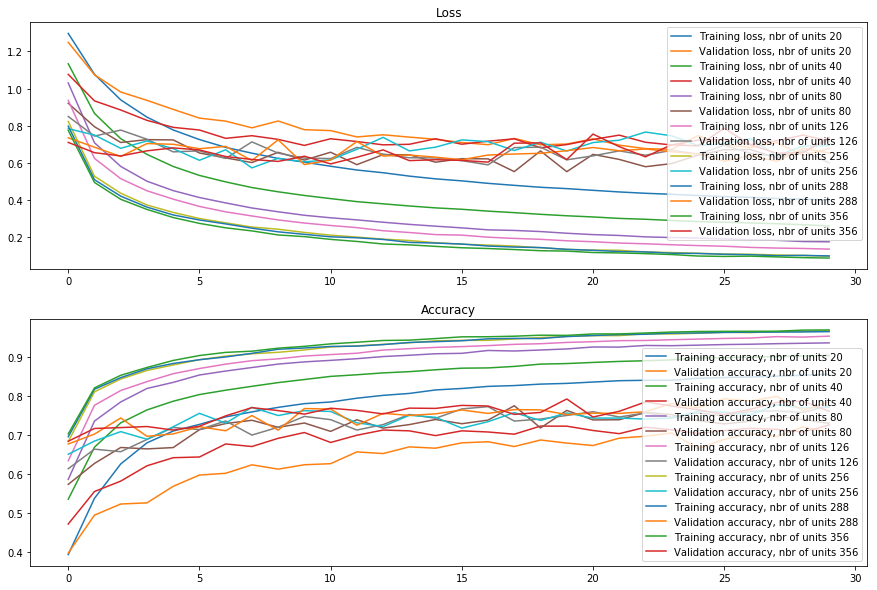

In [35]:
hidden_dim = [20,40,80,126,256,288,356]
testAcc = np.zeros((1,len(hidden_dim)))
nbrIts = 5

plt.figure(0,figsize=(15, 10))
for i in range(len(hidden_dim)):
    
    sumAcc = 0 
    for j in range(nbrIts):
        model = modelSingleLSTMlayer(hidden_dim[i])
        historyFirstModel = model.fit(trainX, trainY, epochs=30, batch_size=100, validation_split=0.2)
    
        predY = model.predict(testX)
        yTestClass = np.argmax(testY, axis=2)
        yPredClass = np.argmax(predY, axis=2)
        sumAcc = sumAcc + (1/nbrIts)*(accuracy_score(yTestClass, yPredClass))
    
    testAcc[0,i] = sumAcc
    plt.subplot(2, 1, 1)
    plt.plot(historyFirstModel.history['loss'],label = 'Training loss, nbr of units ' + str(hidden_dim[i]))
    plt.plot(historyFirstModel.history['val_loss'],label = 'Validation loss, nbr of units ' + str(hidden_dim[i]))
    plt.title('Loss')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(historyFirstModel.history['categorical_accuracy'],label = 'Training accuracy, nbr of units ' + str(hidden_dim[i]))
    plt.plot(historyFirstModel.history['val_categorical_accuracy'],label = 'Validation accuracy, nbr of units ' + str(hidden_dim[i]))
    plt.title('Accuracy')
    plt.legend()



Text(0,0.5,'Test acc')

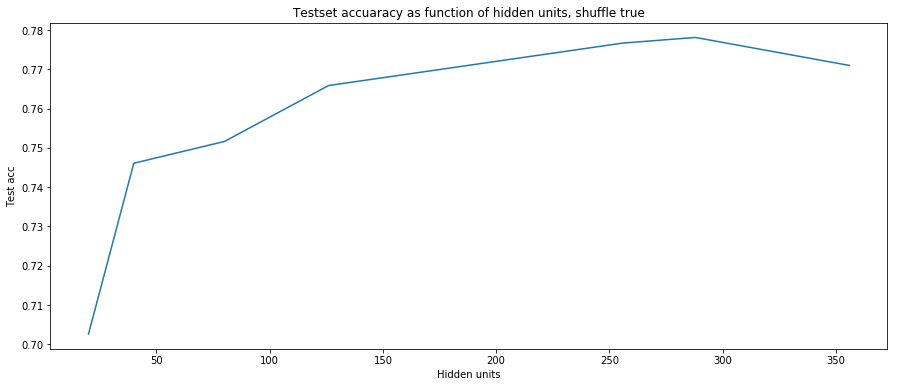

In [36]:
plt.figure(0,figsize=(15, 6))
plt.plot(hidden_dim,testAcc[0,:])
plt.title('Testset accuaracy as function of hidden units, shuffle true')
plt.xlabel('Hidden units')
plt.ylabel('Test acc')

In [34]:
model = modelSingleLSTMlayer(350)
historyFirstModel = model.fit(trainX, trainY, epochs=30, batch_size=100, validation_split=0.2)
predY = model.predict(testX)
yTestClass = np.argmax(testY, axis=2)
yPredClass = np.argmax(predY, axis=2)
acc = accuracy_score(yTestClass, yPredClass)
print("Accuracy: %.2f" % acc)

Train on 17727 samples, validate on 4432 samples
Epoch 1/30
17727/17727 [==============================] - 28s 2ms/step - loss: 0.7801 - categorical_accuracy: 0.6986 - val_loss: 0.7676 - val_categorical_accuracy: 0.6559
Epoch 2/30
17727/17727 [==============================] - 6s 351us/step - loss: 0.4970 - categorical_accuracy: 0.8165 - val_loss: 0.7320 - val_categorical_accuracy: 0.6870
Epoch 3/30
17727/17727 [==============================] - 6s 353us/step - loss: 0.4058 - categorical_accuracy: 0.8526 - val_loss: 0.6382 - val_categorical_accuracy: 0.7292
Epoch 4/30
17727/17727 [==============================] - 6s 358us/step - loss: 0.3516 - categorical_accuracy: 0.8736 - val_loss: 0.6399 - val_categorical_accuracy: 0.7292
Epoch 5/30
17727/17727 [==============================] - 6s 355us/step - loss: 0.3152 - categorical_accuracy: 0.8845 - val_loss: 0.6742 - val_categorical_accuracy: 0.7236
Epoch 6/30
17727/17727 [==============================] - 6s 349us/step - loss: 0.2844 - cat